In [ ]:
# Import the necessary libraries. 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore") 
np.random.seed(42) 
# Data
kickstarter = pd.read_csv("https://raw.githubusercontent.com/rohithkuna/Rohith-IT_533/main/rohith%20dm%20dataset.csv", encoding="ISO-8859-1") # USE YOUR OWN DATA ON GITHUB
kickstarter = kickstarter.rename(columns = {'usd pledged': 'usd_pledged'}) 
kickstarter.dropna(inplace=True) 
kickstarter.head(5) 

,ï»¿ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,10/9/2015,1000,8/11/2015 12:12,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,11/1/2017,30000,9/2/2017 4:43,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2/26/2013,45000,1/12/2013 0:20,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,4/16/2012,5000,3/17/2012 3:24,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,8/29/2015,19500,7/4/2015 8:35,1283.0,canceled,14,US,1283.0,1283.0,19500.00


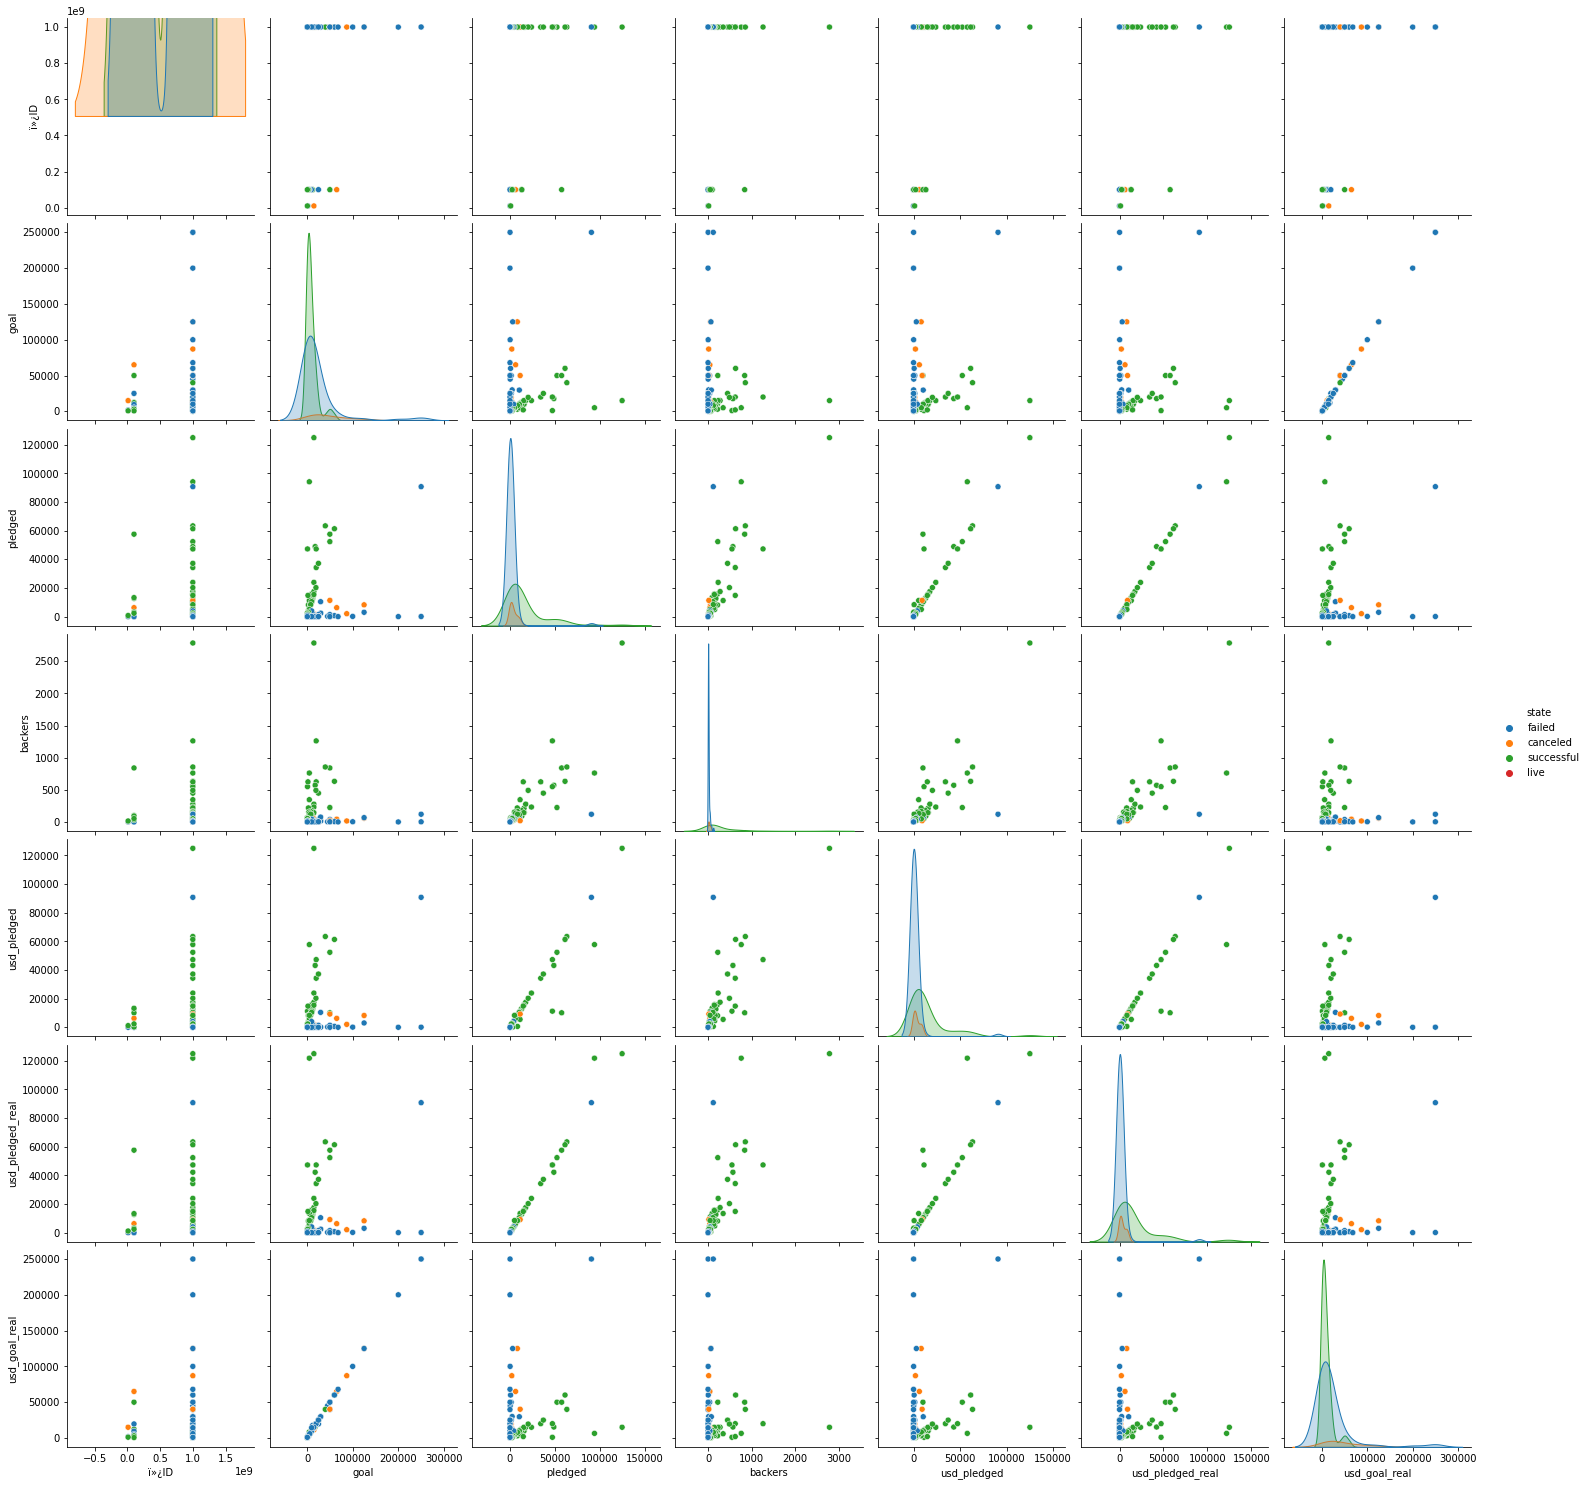

In [ ]:
sns.pairplot(kickstarter,hue="state", height=3, diag_kind="kde")

1. Describing the output of a Neural Network.  
 To get the final output for the Neural Networ we first use EDA which is nothing but the Exploitary Data Analysis to Extract the data and then we reduce the data only to the numerical values and one non-numerical value. Ater reducing we convert the non-numerical value to the numerical value assigning particular numbers to the particular words.

In [ ]:
kickstarter_nn = pd.DataFrame(kickstarter, columns = ['goal', 'pledged', 'backers','usd_pledged','usd_pledged_real', 'state'])
kickstarter_nn.head()

,goal,pledged,backers,usd_pledged,usd_pledged_real,state
0,1000,0.0,0,0.0,0.0,failed
1,30000,2421.0,15,100.0,2421.0,failed
2,45000,220.0,3,220.0,220.0,failed
3,5000,1.0,1,1.0,1.0,failed
4,19500,1283.0,14,1283.0,1283.0,canceled


In [ ]:
# Replace failed with 0, canceled with 1, live with 2, and successful with 3, and suspended with 4 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
kickstarter["state"] = labelencoder.fit_transform(kickstarter_nn["state"])
state = pd.DataFrame({'state': ['failed', 'canceled', 'successful', 'suspended']})
kickstarter_nn.head()

,goal,pledged,backers,usd_pledged,usd_pledged_real,state
0,1000,0.0,0,0.0,0.0,1
1,30000,2421.0,15,100.0,2421.0,1
2,45000,220.0,3,220.0,220.0,1
3,5000,1.0,1,1.0,1.0,1
4,19500,1283.0,14,1283.0,1283.0,0


In [ ]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df
kickstarter_nn = create_dummies(kickstarter_nn,"state")

kickstarter_nn.head()

,goal,pledged,backers,usd_pledged,usd_pledged_real,state,state_0,state_1,state_2,state_3
0,1000,0.0,0,0.0,0.0,1,0,1,0,0
1,30000,2421.0,15,100.0,2421.0,1,0,1,0,0
2,45000,220.0,3,220.0,220.0,1,0,1,0,0
3,5000,1.0,1,1.0,1.0,1,0,1,0,0
4,19500,1283.0,14,1283.0,1283.0,0,1,0,0,0


2. To make the algrithm work I've adjusted some of the things like changing the categorical value. Also by making the adjustments we get the accurate value.

In [ ]:
# Features before mean normalization
unscaled_features = kickstarter_nn[['goal','pledged','backers','usd_pledged', 'usd_pledged_real']]

# Mean Normalization to have a faster classifier 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Calculate μ & σ(fit) and apply the transformation(transform)
unscaled_features_array = sc.fit_transform(unscaled_features.values)

# Assign the scaled data to a DataFrame & use the index and columns arguments to keep your original indices and column names:
scaled_features = pd.DataFrame(unscaled_features_array, index=unscaled_features.index, columns=unscaled_features.columns)

scaled_features.head()

,goal,pledged,backers,usd_pledged,usd_pledged_real
0,-0.453197,-0.413619,-0.365315,-0.398541,-0.403155
1,0.313278,-0.283252,-0.313851,-0.392581,-0.278744
2,0.709730,-0.401772,-0.355022,-0.385429,-0.391849
3,-0.347476,-0.413565,-0.361884,-0.398482,-0.403103
4,0.035761,-0.344531,-0.317282,-0.322075,-0.337224


In [ ]:
from sklearn.model_selection import train_test_split
X = scaled_features
y = kickstarter_nn['state']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.neural_network import MLPClassifier

# Initializing the multilayer perceptron
# running this with all the default settings, including a hidden_layer_sizes setting of 100 adn 200 maximum iterations. 
# Verbose is on so we can see how this runs.

mlp1 = MLPClassifier(verbose=1) 

3. Gradient Descent.      
IT is nothing but an iterative first-order optimisation algorithm used to find a local minimum/maximum of a given function.


In [ ]:
mlp1.fit(X_train, y_train)

Iteration 1, loss = 1.43764583
Iteration 2, loss = 1.41564898
Iteration 3, loss = 1.39444772
Iteration 4, loss = 1.37395644
Iteration 5, loss = 1.35422671
Iteration 6, loss = 1.33520579
Iteration 7, loss = 1.31683643
Iteration 8, loss = 1.29906785
Iteration 9, loss = 1.28186877
Iteration 10, loss = 1.26517078
Iteration 11, loss = 1.24893031
Iteration 12, loss = 1.23311682
Iteration 13, loss = 1.21770486
Iteration 14, loss = 1.20267466
Iteration 15, loss = 1.18801255
Iteration 16, loss = 1.17370257
Iteration 17, loss = 1.15972781
Iteration 18, loss = 1.14606461
Iteration 19, loss = 1.13270353
Iteration 20, loss = 1.11961052
Iteration 21, loss = 1.10676953
Iteration 22, loss = 1.09422045
Iteration 23, loss = 1.08196816
Iteration 24, loss = 1.07000707
Iteration 25, loss = 1.05834422
Iteration 26, loss = 1.04697851
Iteration 27, loss = 1.03590258
Iteration 28, loss = 1.02509450
Iteration 29, loss = 1.01453944
Iteration 30, loss = 1.00422187
Iteration 31, loss = 0.99414577
Iteration 32, los

MLPClassifier(verbose=1)

In [ ]:
print (mlp1.score(X_test,y_test))

0.8


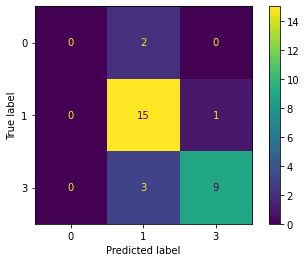

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp1, X_test, y_test)

In [ ]:
 #Now, let's see what the predictions look like
y_pred = mlp1.predict(X_test)
print("Test set predictions: \n {}".format(y_pred))

Test set predictions: 
 [3 3 1 3 3 1 1 1 1 1 1 3 1 1 3 1 1 1 1 1 1 1 1 3 3 3 1 1 1 3]


In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.75      0.94      0.83        16
           3       0.90      0.75      0.82        12

    accuracy                           0.80        30
   macro avg       0.55      0.56      0.55        30
weighted avg       0.76      0.80      0.77        30

